In [169]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [14]:
import numpy as np
import pandas as pd

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
import sys
sys.path.append('/home/fvadell/ml-tests/labs-ml-group/modules')
import some_functions

In [10]:
#style.use('seaborn-poster') #sets the size of the charts
plt.style.use('seaborn-darkgrid')

In [11]:
seed = 1

## Datos

Los datos que estoy usando son los de ZonaProp que fueron usados para la maestría de minería de datos en FCEN en el año 2019.

In [79]:
path = '/home/fvadell/ml-tests/labs-ml-group/maestria-2019/'

Cargo contactos

In [80]:
contactos = pd.read_csv(path + 'contactos_train.csv')
print("length: ", len(contactos))
contactos.head()

length:  1364167


,fecha,idaviso,idusuario
0,2018-09-01 00:00:17,828fe5f454d9eba21f34c875feb54832ec79d3cd,fe5f051f4c50d1208c3faadb75159ac1d4ba369f
1,2018-09-01 00:00:17,3712332931a3325d2dc3247b2bb0f5fddc8235cb,7d3839a75ed8eab68e13c0a9781df04116509ae3
2,2018-09-01 00:00:38,aa370e3eb735b4b9cc80d01fc08b91aa6a34c225,03b1c99edd2d51d803e6ba8e458b988442ce3043
3,2018-09-01 00:00:50,69df702ea486564c9065385c0c96926d91465e79,fcdbdee77a7c8d16b861959920a8df5d265fd451
4,2018-09-01 00:00:55,c9237480757df8e035b8ff19d2856c0f4c5a9cf0,518a58b16e79b63d07d7673a0fcb63231d4689a8


Cargo usuarios

In [81]:
user_feat = pd.read_csv(path + 'users_features.csv')
print("length: ", len(user_feat))
user_feat.head()

length:  275140


,fecha_de_alta,ultima_vez_que_se_logueo,idusuario
0,2012-10-04 00:00:00,2019-01-15 07:53:34,8d94cbff31ee48126e360f852af03edc82b058d6
1,2012-10-05 00:00:00,2019-02-09 09:36:59,b91164f23693bfb480a66405af98e8bc99740d60
2,2012-10-05 00:00:00,2019-03-24 17:14:50,799870e7ec6786a0aecc745d76a773e3a92df5a7
3,2012-10-08 00:00:00,2019-03-05 17:51:30,11afd5b3a796b3cdfa65ba90d121535de5023e86
4,2012-10-08 00:00:00,2018-12-12 19:00:21,a8176dc67724707f77f5341b3bd74fb75a320372


Cargo hits

In [82]:
user_hit = pd.read_csv(path + 'users_hitaviso.csv')
print("length: ", len(user_hit))
user_hit.head()

length:  15094054


,portal,date,idaviso,idusuario
0,ZPAR,2018-12-09,f87302f54c651cc0734dbc36143c406a2c0ef79d,11a16489177fbec23b1c879d592e06ba9a003676
1,ZPAR,2018-12-09,9969de0b6d10900a3006f520e8a2071a729392fb,11a16489177fbec23b1c879d592e06ba9a003676
2,ZPAR,2018-12-05,6f133a8d22e7502f121808cd9c3c670fe89edd8b,e6062ad04f457d48d093fe10c4dfff410e5df866
3,ZPAR,2018-11-07,1573e1b3eb35311d43b788b43bc2ee9dd3c838c5,e6062ad04f457d48d093fe10c4dfff410e5df866
4,ZPAR,2018-11-07,fd195846fbbf6e66c8ba330bfd47bd4d2c713240,e6062ad04f457d48d093fe10c4dfff410e5df866


Cargo avisos

In [83]:
items_feat = pd.read_csv(path + 'items_features.csv')
print("length: ", len(items_feat))
items_feat.head()

length:  265713


,fecha_alta,precio,moneda,tipo_de_propiedad,tipo_de_operacion,habitaciones,ambientes,garages,banos,metros_cuadrados,metros_totales,antiguedad,barrio,idaviso
0,2012-10-04 00:00:00,85000.0,USD,Terreno agrícola,Venta,0.0,1.0,0.0,0.0,NaN,NaN,0.0,Campana,8efcfc866ca10c1951d41afb45c902b9c9d0becd
1,2012-10-22 00:00:00,525000.0,USD,Apartamento,Venta,2.0,3.0,0.0,2.0,135.0,135.0,0.0,Recoleta,c0c6523c19f33e27b537944a075ce0f8637bc853
2,2012-10-22 00:00:00,380000.0,USD,Apartamento,Venta,1.0,2.0,0.0,1.0,109.0,109.0,0.0,Recoleta,8341378d32195b296c3fc21fd3d6b018a3555213
3,2013-12-11 00:00:00,0.0,USD,Apartamento,Venta,1.0,1.0,0.0,1.0,48.0,55.0,-1.0,Belgrano,e7282ca8fbf8d84be6e60775ac5ace6ce2761862
4,2013-12-11 00:00:00,0.0,USD,Apartamento,Venta,1.0,1.0,0.0,1.0,38.0,45.0,-1.0,Belgrano,01af5562466db34376e7ce41bec08a23da3e447a


### Avisos

In [119]:
items_feat = pd.read_csv(path + 'items_features.csv')
print("length: ", len(items_feat))
items_feat.head()

length:  265713


,fecha_alta,precio,moneda,tipo_de_propiedad,tipo_de_operacion,habitaciones,ambientes,garages,banos,metros_cuadrados,metros_totales,antiguedad,barrio,idaviso
0,2012-10-04 00:00:00,85000.0,USD,Terreno agrícola,Venta,0.0,1.0,0.0,0.0,NaN,NaN,0.0,Campana,8efcfc866ca10c1951d41afb45c902b9c9d0becd
1,2012-10-22 00:00:00,525000.0,USD,Apartamento,Venta,2.0,3.0,0.0,2.0,135.0,135.0,0.0,Recoleta,c0c6523c19f33e27b537944a075ce0f8637bc853
2,2012-10-22 00:00:00,380000.0,USD,Apartamento,Venta,1.0,2.0,0.0,1.0,109.0,109.0,0.0,Recoleta,8341378d32195b296c3fc21fd3d6b018a3555213
3,2013-12-11 00:00:00,0.0,USD,Apartamento,Venta,1.0,1.0,0.0,1.0,48.0,55.0,-1.0,Belgrano,e7282ca8fbf8d84be6e60775ac5ace6ce2761862
4,2013-12-11 00:00:00,0.0,USD,Apartamento,Venta,1.0,1.0,0.0,1.0,38.0,45.0,-1.0,Belgrano,01af5562466db34376e7ce41bec08a23da3e447a


Hay tres tipos de moneda distintos

In [120]:
items_feat['moneda'].unique()

array(['USD', 'ARS', 'UYU'], dtype=object)

Por ahora vamos a filtrar los que tienen precio en USD y los de tipo de operacion Venta

In [121]:
items_feat = items_feat[items_feat['moneda']=='USD']

In [122]:
len(items_feat)

148097

In [123]:
len(items_feat[items_feat['tipo_de_operacion']=='Venta'])

137465

In [124]:
items_feat = items_feat[items_feat['tipo_de_operacion']=='Venta']

Veo cuántos datos hay con precio 0

In [125]:
(items_feat['precio']<1).sum()

8602

Filtramos las ventas que tienen precio 0

In [126]:
items_feat = items_feat[items_feat['precio']>0]

''

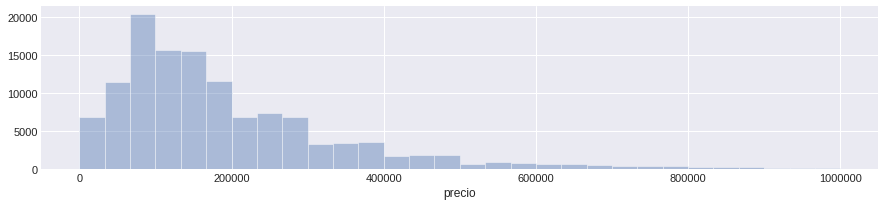

In [127]:
plt.figure(figsize = (15,3))
sns.distplot(items_feat[(items_feat['precio'].notna())&
                        (items_feat['precio']<1000000)&
                        (items_feat['tipo_de_operacion']=='Venta')&
                        (items_feat['moneda']=='USD')]['precio'], kde=False, rug=False, bins = 30)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
;

### Filtramos NaNs

Filtramos los casos que no tienen datos en "metros_cuadrados" o en "precio" y nos quedamos sólo con las "Ventas"

In [128]:
items_feat = items_feat[items_feat['metros_cuadrados'].notna()]
items_feat = items_feat[items_feat['precio'].notna()]
items_feat = items_feat[items_feat['tipo_de_operacion']=='Venta']

In [129]:
print(len(items_feat))

120074


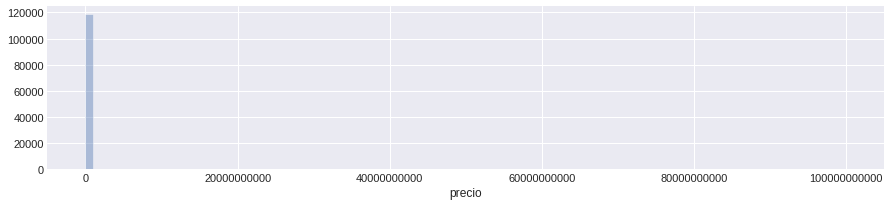

In [131]:
some_functions.plot_cont_dist(items_feat, var='precio', bins = 100)

Vemos cuál es el máximo y cuál el mínimo de los precios

In [132]:
min(items_feat['precio']), max(items_feat['precio'])

(1.0, 111111111111.0)

In [133]:
items_feat['precio'].median(), items_feat['precio'].mean()

(159000.0, 4091231.361177274)

La diferencia enorme entre la mediana y la media nos dice que hay algo mal con los precios. Vamos a filtrar.

#### Puede ser buena idea filtrar los outliers usando el percentil .05 y .95

In [134]:
p_high = items_feat['precio'].quantile(.95)
p_low = items_feat['precio'].quantile(.05)
print(p_high), print(p_low);

667637.8999999965
41581.90000000007


In [135]:
df = items_feat[items_feat['precio']>=p_low]
df = df[df['precio']<=p_high]

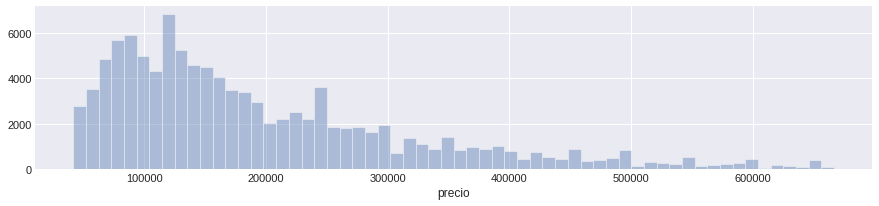

In [137]:
some_functions.plot_cont_dist(df, var='precio', bins = 60)

#### Otra opción es usar la variable precio en escala logarítmca

In [138]:
import math
items_feat['log_precio'] = [math.log(x, 10) for x in items_feat['precio']]

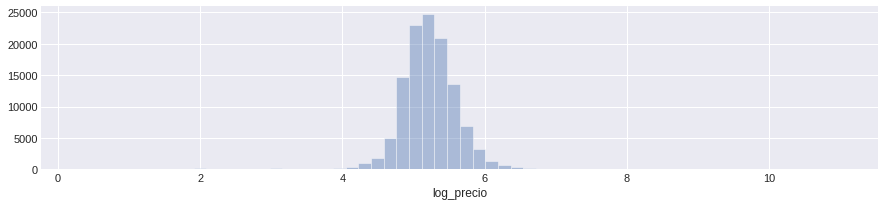

In [139]:
some_functions.plot_cont_dist(items_feat, var='log_precio', bins = 60)

In [140]:
items_feat = items_feat.drop('log_precio', axis = 1)

Voy a filtrar

In [141]:
items_feat = items_feat[items_feat['precio']>=p_low]
items_feat = items_feat[items_feat['precio']<=p_high]

In [142]:
items_feat.reset_index(drop=True, inplace = True)

In [143]:
print(len(items_feat))
items_feat.head()

108066


,fecha_alta,precio,moneda,tipo_de_propiedad,tipo_de_operacion,habitaciones,ambientes,garages,banos,metros_cuadrados,metros_totales,antiguedad,barrio,idaviso
0,2012-10-22 00:00:00,525000.0,USD,Apartamento,Venta,2.0,3.0,0.0,2.0,135.0,135.0,0.0,Recoleta,c0c6523c19f33e27b537944a075ce0f8637bc853
1,2012-10-22 00:00:00,380000.0,USD,Apartamento,Venta,1.0,2.0,0.0,1.0,109.0,109.0,0.0,Recoleta,8341378d32195b296c3fc21fd3d6b018a3555213
2,2013-04-20 00:00:00,73000.0,USD,Terreno agrícola,Venta,0.0,1.0,0.0,0.0,404.0,404.0,0.0,Tigre,8fce08f15f9b853f84d0049ca5993a98a673b2d4
3,2014-04-17 00:00:00,160000.0,USD,Apartamento,Venta,1.0,2.0,0.0,1.0,45.0,49.0,0.0,Caballito,5fc6ae60696d544e4f0af98d44dc107c4a7a77a4
4,2014-04-17 00:00:00,258000.0,USD,Apartamento,Venta,2.0,3.0,0.0,2.0,72.0,78.0,0.0,Caballito,0f753e04ce668f62ddceb5ac2345682b28af6e07


## Creo el primer dataset basado en los leads y hits

Tomo una muestra de la cantidad de hits y lo agrego a la matriz de ratings

In [292]:
hit_indices = list(some_functions.sample_indices(user_hit, seed = seed, test_pct=0.1))

In [293]:
user_hit = user_hit.iloc[hit_indices, :]

In [294]:
ratings = pd.merge(user_hit, contactos, on = ['idaviso', 'idusuario'], how = 'outer')

In [295]:
len(ratings)

2726485

In [297]:
len(ratings['idaviso'].unique())

364059

In [298]:
len(ratings['idusuario'].unique())

273971

Y agrego la columna de score

In [185]:
ratings['contact_score']=list(np.where(ratings['fecha'].isnull(), 0, 1))

In [186]:
ratings['hit_score']=list(np.where(ratings['portal'].isnull(), 0, 1))

In [187]:
ratings['score']=[2 if x>0 else 1 for x in ratings['contact_score']]

In [188]:
print(len(ratings))
ratings.head(1)

2726485


,portal,date,idaviso,idusuario,fecha,contact_score,hit_score,score
0,ZPAR,2018-12-09,25c947c7270baa9c5e5dd059a31385d3a3ad88a6,f872765a55bc017b86476ce598470897e1ecb879,NaN,0,1,1


Saco las columnas de 'contact_score', 'hit_score' y 'portal' que ya no me sirven

In [189]:
ratings = ratings.drop(['contact_score', 'hit_score', 'portal'], axis = 1)

In [190]:
ratings.head(1)

,date,idaviso,idusuario,fecha,score
0,2018-12-09,25c947c7270baa9c5e5dd059a31385d3a3ad88a6,f872765a55bc017b86476ce598470897e1ecb879,NaN,1


Me quedo con el último hit y el último contacto

In [191]:
ratings.sort_values(['idaviso', 'idusuario', 'date', 'fecha'], ascending=[True, True, False, False], inplace=True)
ratings.reset_index(drop=True, inplace=True)
ratings = ratings.drop_duplicates(subset=['idaviso', 'idusuario'])

In [192]:
ratings.columns = ['hit_date', 'idaviso', 'idusuario', 'contact_date', 'score']

In [193]:
print(len(ratings))
ratings.head()

2675511


,hit_date,idaviso,idusuario,contact_date,score
0,NaN,00000424f4c62894b374d79e8bb7e9d3586439f7,07439857598bd8d779c56366eaf202d47c64da85,2018-10-29 19:10:08,2
1,2018-12-04,00000424f4c62894b374d79e8bb7e9d3586439f7,2fa7bf128271277b65da278e3c08160467c4f042,NaN,1
2,2018-10-23,00000424f4c62894b374d79e8bb7e9d3586439f7,3a149cb9ad60443e45d1d030f47820bfdc116c9e,NaN,1
3,NaN,00000424f4c62894b374d79e8bb7e9d3586439f7,4a5efc9e99f04956322d8635c1be61686df683c8,2018-09-23 09:37:59,2
4,2018-11-20,00000424f4c62894b374d79e8bb7e9d3586439f7,5013e74ac3c162db759d0d58c5cf9572219aa7f4,NaN,1


### Avisos

In [194]:
items_feat = pd.read_csv(path/'items_features.csv')
print("length: ", len(items_feat))
items_feat.head()

length:  265713


,fecha_alta,precio,moneda,tipo_de_propiedad,tipo_de_operacion,habitaciones,ambientes,garages,banos,metros_cuadrados,metros_totales,antiguedad,barrio,idaviso
0,2012-10-04 00:00:00,85000.0,USD,Terreno agrícola,Venta,0.0,1.0,0.0,0.0,NaN,NaN,0.0,Campana,8efcfc866ca10c1951d41afb45c902b9c9d0becd
1,2012-10-22 00:00:00,525000.0,USD,Apartamento,Venta,2.0,3.0,0.0,2.0,135.0,135.0,0.0,Recoleta,c0c6523c19f33e27b537944a075ce0f8637bc853
2,2012-10-22 00:00:00,380000.0,USD,Apartamento,Venta,1.0,2.0,0.0,1.0,109.0,109.0,0.0,Recoleta,8341378d32195b296c3fc21fd3d6b018a3555213
3,2013-12-11 00:00:00,0.0,USD,Apartamento,Venta,1.0,1.0,0.0,1.0,48.0,55.0,-1.0,Belgrano,e7282ca8fbf8d84be6e60775ac5ace6ce2761862
4,2013-12-11 00:00:00,0.0,USD,Apartamento,Venta,1.0,1.0,0.0,1.0,38.0,45.0,-1.0,Belgrano,01af5562466db34376e7ce41bec08a23da3e447a


Hay tres tipos de moneda distintos

In [195]:
items_feat['moneda'].unique()

array(['USD', 'ARS', 'UYU'], dtype=object)

Por ahora vamos a filtrar los que tienen precio en USD y los de tipo de operacion Venta

In [196]:
items_feat = items_feat[items_feat['moneda']=='USD']

In [197]:
len(items_feat)

148097

In [198]:
len(items_feat[items_feat['tipo_de_operacion']=='Venta'])

137465

In [199]:
items_feat = items_feat[items_feat['tipo_de_operacion']=='Venta']

Veo cuántos datos hay con precio 0

In [200]:
(items_feat['precio']<1).sum()

8602

Filtramos las ventas que tienen precio 0

In [201]:
items_feat = items_feat[items_feat['precio']>0]

''

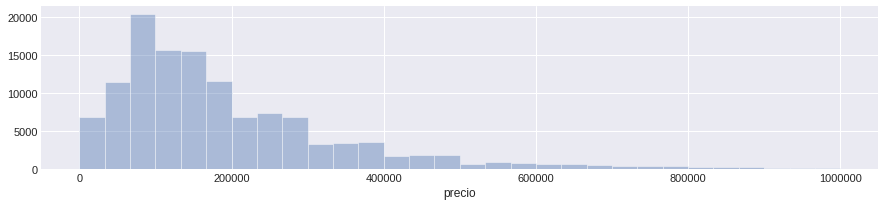

In [202]:
plt.figure(figsize = (15,3))
sns.distplot(items_feat[(items_feat['precio'].notna())&
                        (items_feat['precio']<1000000)&
                        (items_feat['tipo_de_operacion']=='Venta')&
                        (items_feat['moneda']=='USD')]['precio'], kde=False, rug=False, bins = 30)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
;

### Filtramos NaNs

Filtramos los casos que no tienen datos en "metros_cuadrados" o en "precio" y nos quedamos sólo con las "Ventas"

In [203]:
items_feat = items_feat[items_feat['metros_cuadrados'].notna()]
items_feat = items_feat[items_feat['precio'].notna()]
items_feat = items_feat[items_feat['tipo_de_operacion']=='Venta']

In [204]:
print(len(items_feat))

120074


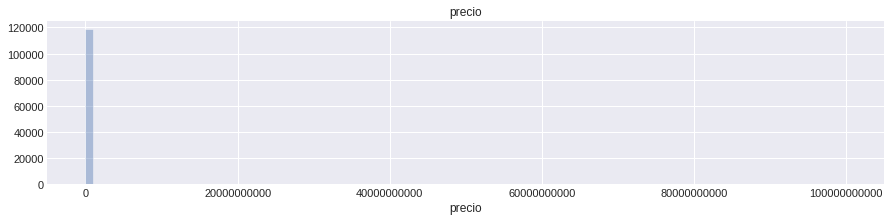

In [205]:
plot_cont_dist(items_feat, var='precio', bins = 100)

Vemos cuál es el máximo y cuál el mínimo de los precios

In [206]:
min(items_feat['precio']), max(items_feat['precio'])

(1.0, 111111111111.0)

In [207]:
items_feat['precio'].median(), items_feat['precio'].mean()

(159000.0, 4091231.361177274)

La diferencia enorme entre la mediana y la media nos dice que hay algo mal con los precios. Vamos a filtrar.

#### Puede ser buena idea filtrar los outliers usando el percentil .05 y .95

In [208]:
p_high = items_feat['precio'].quantile(.95)
p_low = items_feat['precio'].quantile(.05)
print(p_high), print(p_low);

667637.8999999965
41581.90000000007


In [209]:
df = items_feat[items_feat['precio']>=p_low]
df = df[df['precio']<=p_high]

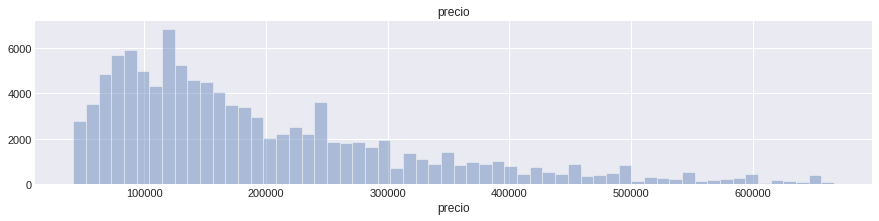

In [210]:
plot_cont_dist(df, var='precio', kde=False, bins = 60)

#### Otra opción es usar la variable precio en escala logarítmca

In [211]:
import math
items_feat['log_precio'] = [math.log(x, 10) for x in items_feat['precio']]

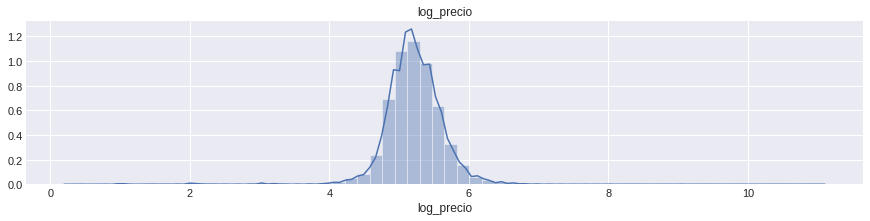

In [212]:
plot_cont_dist(items_feat, var='log_precio', kde=True, bins = 60)

In [213]:
items_feat = items_feat.drop('log_precio', axis = 1)

Voy a filtrar

In [214]:
items_feat = items_feat[items_feat['precio']>=p_low]
items_feat = items_feat[items_feat['precio']<=p_high]

In [215]:
items_feat.reset_index(drop=True, inplace = True)

In [216]:
print(len(items_feat))
items_feat.head()

108066


,fecha_alta,precio,moneda,tipo_de_propiedad,tipo_de_operacion,habitaciones,ambientes,garages,banos,metros_cuadrados,metros_totales,antiguedad,barrio,idaviso
0,2012-10-22 00:00:00,525000.0,USD,Apartamento,Venta,2.0,3.0,0.0,2.0,135.0,135.0,0.0,Recoleta,c0c6523c19f33e27b537944a075ce0f8637bc853
1,2012-10-22 00:00:00,380000.0,USD,Apartamento,Venta,1.0,2.0,0.0,1.0,109.0,109.0,0.0,Recoleta,8341378d32195b296c3fc21fd3d6b018a3555213
2,2013-04-20 00:00:00,73000.0,USD,Terreno agrícola,Venta,0.0,1.0,0.0,0.0,404.0,404.0,0.0,Tigre,8fce08f15f9b853f84d0049ca5993a98a673b2d4
3,2014-04-17 00:00:00,160000.0,USD,Apartamento,Venta,1.0,2.0,0.0,1.0,45.0,49.0,0.0,Caballito,5fc6ae60696d544e4f0af98d44dc107c4a7a77a4
4,2014-04-17 00:00:00,258000.0,USD,Apartamento,Venta,2.0,3.0,0.0,2.0,72.0,78.0,0.0,Caballito,0f753e04ce668f62ddceb5ac2345682b28af6e07


Cruzamos esta informacion con la matriz de ratings

In [217]:
ratings = pd.merge(items_feat, ratings, how='inner')

In [218]:
print(len(ratings))
ratings.head()

646096


,fecha_alta,precio,moneda,tipo_de_propiedad,tipo_de_operacion,habitaciones,ambientes,garages,banos,metros_cuadrados,metros_totales,antiguedad,barrio,idaviso,hit_date,idusuario,contact_date,score
0,2012-10-22 00:00:00,380000.0,USD,Apartamento,Venta,1.0,2.0,0.0,1.0,109.0,109.0,0.0,Recoleta,8341378d32195b296c3fc21fd3d6b018a3555213,NaN,30587a436ca27d04c9ab0c4aa49334390c2d4301,2018-11-22 23:13:30,2
1,2012-10-22 00:00:00,380000.0,USD,Apartamento,Venta,1.0,2.0,0.0,1.0,109.0,109.0,0.0,Recoleta,8341378d32195b296c3fc21fd3d6b018a3555213,2018-11-26,8fc5ac1bc40297233e3815ee33b95e008f5c7d72,NaN,1
2,2013-04-20 00:00:00,73000.0,USD,Terreno agrícola,Venta,0.0,1.0,0.0,0.0,404.0,404.0,0.0,Tigre,8fce08f15f9b853f84d0049ca5993a98a673b2d4,2018-12-03,6ba0a2325bbc77aa623c7f2548e56415083715da,NaN,1
3,2013-04-20 00:00:00,73000.0,USD,Terreno agrícola,Venta,0.0,1.0,0.0,0.0,404.0,404.0,0.0,Tigre,8fce08f15f9b853f84d0049ca5993a98a673b2d4,2018-11-29,998180aa5a1f0760720215cdea088e3c90023daf,NaN,1
4,2014-04-17 00:00:00,160000.0,USD,Apartamento,Venta,1.0,2.0,0.0,1.0,45.0,49.0,0.0,Caballito,5fc6ae60696d544e4f0af98d44dc107c4a7a77a4,NaN,5cd46567a22489f795dd76fca1cbf063e7aace8a,2018-09-30 00:31:16,2


In [219]:
len(ratings['idaviso'].unique()), len(items_feat)

(102553, 108066)

## Leads por usuario

In [220]:
ratings.head()

,fecha_alta,precio,moneda,tipo_de_propiedad,tipo_de_operacion,habitaciones,ambientes,garages,banos,metros_cuadrados,metros_totales,antiguedad,barrio,idaviso,hit_date,idusuario,contact_date,score
0,2012-10-22 00:00:00,380000.0,USD,Apartamento,Venta,1.0,2.0,0.0,1.0,109.0,109.0,0.0,Recoleta,8341378d32195b296c3fc21fd3d6b018a3555213,NaN,30587a436ca27d04c9ab0c4aa49334390c2d4301,2018-11-22 23:13:30,2
1,2012-10-22 00:00:00,380000.0,USD,Apartamento,Venta,1.0,2.0,0.0,1.0,109.0,109.0,0.0,Recoleta,8341378d32195b296c3fc21fd3d6b018a3555213,2018-11-26,8fc5ac1bc40297233e3815ee33b95e008f5c7d72,NaN,1
2,2013-04-20 00:00:00,73000.0,USD,Terreno agrícola,Venta,0.0,1.0,0.0,0.0,404.0,404.0,0.0,Tigre,8fce08f15f9b853f84d0049ca5993a98a673b2d4,2018-12-03,6ba0a2325bbc77aa623c7f2548e56415083715da,NaN,1
3,2013-04-20 00:00:00,73000.0,USD,Terreno agrícola,Venta,0.0,1.0,0.0,0.0,404.0,404.0,0.0,Tigre,8fce08f15f9b853f84d0049ca5993a98a673b2d4,2018-11-29,998180aa5a1f0760720215cdea088e3c90023daf,NaN,1
4,2014-04-17 00:00:00,160000.0,USD,Apartamento,Venta,1.0,2.0,0.0,1.0,45.0,49.0,0.0,Caballito,5fc6ae60696d544e4f0af98d44dc107c4a7a77a4,NaN,5cd46567a22489f795dd76fca1cbf063e7aace8a,2018-09-30 00:31:16,2


In [221]:
leads_per_user = ratings.groupby(['idusuario'], as_index=False).size().reset_index(name='leads_user')

In [222]:
assert(len(leads_per_user['idusuario'])==len(ratings['idusuario'].unique())) 

In [223]:
leads_per_user.sort_values('leads_user', ascending = False, inplace = True)
leads_per_user.reset_index(drop = True, inplace = True)

In [224]:
print('Total de usuarios con leads: ',len(leads_per_user))
print('Usuarios con más de 10 leads: ', len(leads_per_user[leads_per_user['leads_user']>10]))
print('Usuarios con más de 100 leads: ', len(leads_per_user[leads_per_user['leads_user']>100]))

Total de usuarios con leads:  106380
Usuarios con más de 10 leads:  15515
Usuarios con más de 100 leads:  212


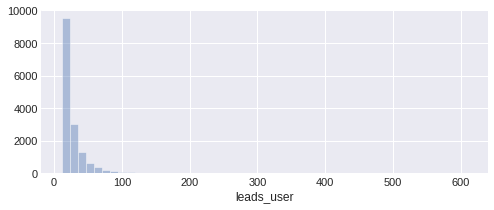

In [225]:
plt.figure(figsize = (8,3))
ax = sns.distplot(leads_per_user[leads_per_user['leads_user']>10]['leads_user'], kde = False)

Me quedo con los usuarios que tienen entre 10 y 99 leads

In [226]:
leads_per_user=leads_per_user[leads_per_user['leads_user']>=10]
leads_per_user=leads_per_user[leads_per_user['leads_user']<100]

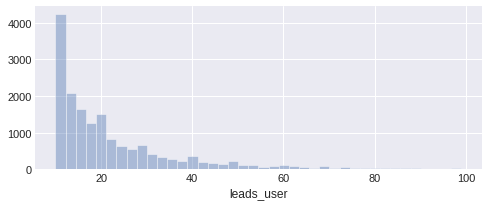

In [227]:
plt.figure(figsize = (8,3))
ax = sns.distplot(leads_per_user['leads_user'], bins = 40,kde = False)

Hago un inner join con ratings para quedarme con los ratings para los usuarios de mayor actividad 

In [228]:
print(len(ratings))
ratings.head(2)

646096


,fecha_alta,precio,moneda,tipo_de_propiedad,tipo_de_operacion,habitaciones,ambientes,garages,banos,metros_cuadrados,metros_totales,antiguedad,barrio,idaviso,hit_date,idusuario,contact_date,score
0,2012-10-22 00:00:00,380000.0,USD,Apartamento,Venta,1.0,2.0,0.0,1.0,109.0,109.0,0.0,Recoleta,8341378d32195b296c3fc21fd3d6b018a3555213,NaN,30587a436ca27d04c9ab0c4aa49334390c2d4301,2018-11-22 23:13:30,2
1,2012-10-22 00:00:00,380000.0,USD,Apartamento,Venta,1.0,2.0,0.0,1.0,109.0,109.0,0.0,Recoleta,8341378d32195b296c3fc21fd3d6b018a3555213,2018-11-26,8fc5ac1bc40297233e3815ee33b95e008f5c7d72,NaN,1


Filtramos la matriz de ratings usando sólo los usuarios de leads_per_user

In [229]:
ratings = pd.merge(leads_per_user, ratings, how='inner')

In [230]:
print(len(ratings))
ratings.head()

386407


,idusuario,leads_user,fecha_alta,precio,moneda,tipo_de_propiedad,tipo_de_operacion,habitaciones,ambientes,garages,banos,metros_cuadrados,metros_totales,antiguedad,barrio,idaviso,hit_date,contact_date,score
0,88c006e4b758fdde74467a38e825a814b478c4f8,99,2015-06-03 00:00:00,150000.0,USD,Apartamento,Venta,0.0,2.0,1.0,1.0,40.0,40.0,49.0,San Isidro,855333f1bf99bb1618c1a65e3d3acdff4fbf1947,2018-10-15,2018-10-12 16:56:13,2
1,88c006e4b758fdde74467a38e825a814b478c4f8,99,2015-09-07 00:00:00,95000.0,USD,PH,Venta,2.0,0.0,0.0,2.0,75.0,90.0,20.0,San Isidro,b68404cf3b92369a78d8aba402b0fa6efacbb3ec,2018-10-09,NaN,1
2,88c006e4b758fdde74467a38e825a814b478c4f8,99,2015-11-07 00:00:00,88532.0,USD,Apartamento,Venta,1.0,2.0,1.0,1.0,38.0,42.0,NaN,Tigre,03b9ca4a788f1365721860aa315e3037c4b92888,NaN,2018-09-21 15:23:03,2
3,88c006e4b758fdde74467a38e825a814b478c4f8,99,2016-01-25 12:15:46,80000.0,USD,Apartamento,Venta,1.0,2.0,0.0,1.0,28.0,31.0,34.0,Vicente López,9207ec6edfe7f5dad6f53e7ea178b81ec318a73a,2018-10-13,2018-10-09 10:44:23,2
4,88c006e4b758fdde74467a38e825a814b478c4f8,99,2016-06-14 14:10:13,95000.0,USD,Apartamento,Venta,1.0,2.0,0.0,1.0,38.0,38.0,40.0,Nuñez,5dc290859d8748ebe367258c638c9aab1536a1ef,2018-10-15,NaN,1


### Barrio favorito

In [231]:
fav_barrio = ratings[ratings['score']==2].filter(['idusuario', 'barrio']).groupby(['idusuario'], as_index = False).agg(lambda x:x.value_counts().index[0])

In [232]:
fav_barrio.columns = ['idusuario', 'fav_barrio']

In [233]:
fav_barrio.head()

,idusuario,fav_barrio
0,0003e155940c4c891e70cfeef193a88d322c9105,Villa Crespo
1,0005a94d35764f5d7d5e9275e343e3bf2d939f2e,Escobar
2,0005bef2b78d66dbc605afeb4b8d6f3335c963e8,Villa Crespo
3,000d20d01b01bbcfb8236ebc45b2465a0a0eb171,Retiro
4,000d85288a293f90e1ee6c0ac0644554a65da5f4,Villa Crespo


In [234]:
len(fav_barrio), len(ratings['idusuario'].unique())

(15769, 16919)

Agregamos la información de barrio favorito a la matriz de ratings

In [235]:
ratings = pd.merge(ratings, fav_barrio, on = 'idusuario', how = 'outer')

In [236]:
ratings.head()

,idusuario,leads_user,fecha_alta,precio,moneda,tipo_de_propiedad,tipo_de_operacion,habitaciones,ambientes,garages,banos,metros_cuadrados,metros_totales,antiguedad,barrio,idaviso,hit_date,contact_date,score,fav_barrio
0,88c006e4b758fdde74467a38e825a814b478c4f8,99,2015-06-03 00:00:00,150000.0,USD,Apartamento,Venta,0.0,2.0,1.0,1.0,40.0,40.0,49.0,San Isidro,855333f1bf99bb1618c1a65e3d3acdff4fbf1947,2018-10-15,2018-10-12 16:56:13,2,Vicente López
1,88c006e4b758fdde74467a38e825a814b478c4f8,99,2015-09-07 00:00:00,95000.0,USD,PH,Venta,2.0,0.0,0.0,2.0,75.0,90.0,20.0,San Isidro,b68404cf3b92369a78d8aba402b0fa6efacbb3ec,2018-10-09,NaN,1,Vicente López
2,88c006e4b758fdde74467a38e825a814b478c4f8,99,2015-11-07 00:00:00,88532.0,USD,Apartamento,Venta,1.0,2.0,1.0,1.0,38.0,42.0,NaN,Tigre,03b9ca4a788f1365721860aa315e3037c4b92888,NaN,2018-09-21 15:23:03,2,Vicente López
3,88c006e4b758fdde74467a38e825a814b478c4f8,99,2016-01-25 12:15:46,80000.0,USD,Apartamento,Venta,1.0,2.0,0.0,1.0,28.0,31.0,34.0,Vicente López,9207ec6edfe7f5dad6f53e7ea178b81ec318a73a,2018-10-13,2018-10-09 10:44:23,2,Vicente López
4,88c006e4b758fdde74467a38e825a814b478c4f8,99,2016-06-14 14:10:13,95000.0,USD,Apartamento,Venta,1.0,2.0,0.0,1.0,38.0,38.0,40.0,Nuñez,5dc290859d8748ebe367258c638c9aab1536a1ef,2018-10-15,NaN,1,Vicente López


In [237]:
def get_favorite_barrio(df, idusuario, print_error = False):
    try:
        res = df[df['idusuario']==idusuario].barrio.mode()[0]
    except:
        try:
            res = list(ratings_f[ratings_f['idusuario']==idusuario]['barrio'])[0]
        except:
            if print_error: print('No favorite for user ', idusuario)
            res = None
    return res

In [238]:
list(ratings[ratings['idusuario']=='0be09aa945906c8713d4b5fecac821e1ae71bfff']['fav_barrio'])[0]

'Palermo'

## Leads por aviso

In [239]:
#ratings = ratings.drop_duplicates(['idaviso', 'idusuario'])

In [240]:
leads_per_aviso = pd.DataFrame(ratings[ratings['score']==2].idaviso.value_counts())

In [241]:
leads_per_aviso['leads_aviso'] = leads_per_aviso['idaviso']
leads_per_aviso['idaviso'] = leads_per_aviso.index

In [242]:
leads_per_aviso = leads_per_aviso.reset_index(drop=True)

#### Filtramos los avisos con pocos leads

In [243]:
print(len(leads_per_aviso))
leads_per_aviso.head()

63448


,idaviso,leads_aviso
0,32bd9393d46ab99c39e8a111a6cb3dd09349c9df,116
1,25b02a18b3b7d13631eed1ef3513f6e66f60809d,104
2,494664577cfd88f8f65c3350b009ba46b69409b2,89
3,cd175b120211a1b7682b5ac7c755dcef750a123c,84
4,b3d939372698787e2ec469d09f30898e130f82fd,81


In [244]:
leads_per_aviso = leads_per_aviso[(leads_per_aviso['leads_aviso']>=10)]

In [245]:
leads_per_aviso.head()

,idaviso,leads_aviso
0,32bd9393d46ab99c39e8a111a6cb3dd09349c9df,116
1,25b02a18b3b7d13631eed1ef3513f6e66f60809d,104
2,494664577cfd88f8f65c3350b009ba46b69409b2,89
3,cd175b120211a1b7682b5ac7c755dcef750a123c,84
4,b3d939372698787e2ec469d09f30898e130f82fd,81


In [246]:
len(leads_per_aviso)

2547

Agrego la información de leads por aviso y filtramos en la matriz de ratings

In [247]:
ratings = pd.merge(ratings, leads_per_aviso, on = 'idaviso', how = 'inner')

In [248]:
len(ratings['idaviso'].unique()), len(leads_per_aviso)

(2547, 2547)

### Volvemos a filtrar los usuarios con pocos leads

In [249]:
filtro2 = pd.DataFrame(ratings[ratings['score']==2].idusuario.value_counts())

In [250]:
filtro2 = filtro2.reset_index()
filtro2.columns = ['idusuario', 'leads_user']

In [251]:
filtro2.head()

,idusuario,leads_user
0,e2f85daef7f362715d385b0f5537c5f15d7024f1,46
1,8509a6e9f4ba7b5da0e4295cd014dd082ec8158d,43
2,83492229513643e3c4ef94c82e99749003efb288,43
3,09ccd2b490c429dccae195b7d3973edb81080e94,39
4,f2e806b7c926334090e5ea91be6ec151b9c66dcb,39


In [252]:
filtro2 = filtro2[filtro2['leads_user']>=10]

Vuelvo a filtrar la matriz de ratings usando estos usuarios

In [253]:
ratings = pd.merge(ratings.drop('leads_user', axis = 1), filtro2, how = 'inner', on = 'idusuario')

In [254]:
len(ratings)

20141

### Agrego combinaciones falsas y le asigno score 0

In [255]:
b = ratings.filter(['idaviso', 'barrio']).drop_duplicates('idaviso')

In [256]:
print(len(b))
b.head()

2405


,idaviso,barrio
0,855333f1bf99bb1618c1a65e3d3acdff4fbf1947,San Isidro
1,9207ec6edfe7f5dad6f53e7ea178b81ec318a73a,Vicente López
2,2ea5e9ee868f14e58664363db3b6cc48489a54e8,Villa Urquiza
3,0065a55829c9cc24c2f040eab23a3d03c092b5d0,Vicente López
4,9ceec0de18725978367bfabf4d44be0ae4f682ea,Vicente López


In [257]:
leads_per_aviso = pd.merge(leads_per_aviso, b, how = 'inner')

In [258]:
leads_per_aviso[leads_per_aviso['barrio']=='Ezeiza']

,idaviso,leads_aviso,barrio


In [259]:
len(ratings['idusuario'].unique())

1017

In [260]:
df = pd.DataFrame()
i = 0
users = ratings['idusuario'].unique()
cant_users = len(users)
for user in users:
    i = i+1
    #cant_leads = len(ratings[(ratings['idusuario']==user)&(ratings_f['score']==2)])
    cant_leads = ratings[ratings['idusuario']==user].iloc[0,:]['leads_user']
    a = [user for x in range(cant_leads)]
    b = b.sample(frac=1, random_state=seed+i).reset_index(drop=True) #Le aplico un shuffle (el seed va amumentando de a 1 para que no sea el mismo)
    #fav_barrio = get_favorite_barrio(df = ratings_f[ratings_f['score']==2], idusuario = user)
    fav_barrio = list(ratings[ratings['idusuario']==user]['fav_barrio'])[0]
    aux = pd.DataFrame((zip(a, b[b['barrio']!=fav_barrio]['idaviso'])))
    df = pd.concat([df, aux])
    if (i%10 == 0):
        print(i*100/cant_users, end="\r")
print('')
print('Completado!')

99.311701081612584
Completado!


In [261]:
df.columns = ['idusuario', 'idaviso']

In [262]:
len(df), len(ratings[ratings['score']==2])

(15209, 15209)

In [263]:
df[df['idaviso']=='74ab495e93b88a649f2fc6a2477842b4e91ce77f']

,idusuario,idaviso


In [264]:
ratings[ratings['idaviso']=='74ab495e93b88a649f2fc6a2477842b4e91ce77f']

,idusuario,fecha_alta,precio,moneda,tipo_de_propiedad,tipo_de_operacion,habitaciones,ambientes,garages,banos,...,metros_totales,antiguedad,barrio,idaviso,hit_date,contact_date,score,fav_barrio,leads_aviso,leads_user


In [265]:
false_ratings = pd.merge(df, items_feat, how = 'inner', on='idaviso')

false_ratings.drop_duplicates(['idusuario', 'idaviso'], inplace=True)
print(len(false_ratings))

15209


In [266]:
false_ratings[false_ratings['idaviso']=='74ab495e93b88a649f2fc6a2477842b4e91ce77f']

,idusuario,idaviso,fecha_alta,precio,moneda,tipo_de_propiedad,tipo_de_operacion,habitaciones,ambientes,garages,banos,metros_cuadrados,metros_totales,antiguedad,barrio


In [267]:
false_ratings = pd.merge(false_ratings, leads_per_user, on = 'idusuario', how = 'inner')

print(len(false_ratings))
false_ratings.head()

15209


,idusuario,idaviso,fecha_alta,precio,moneda,tipo_de_propiedad,tipo_de_operacion,habitaciones,ambientes,garages,banos,metros_cuadrados,metros_totales,antiguedad,barrio,leads_user
0,e9303a50257d09880a96753b0d897f1f2c34010b,c9a645ec7ec68e89ad05de39b93e75d9b4bb882b,2018-06-13 11:22:06,299900.0,USD,PH,Venta,4.0,5.0,0.0,2.0,137.0,137.0,40.0,Palermo,58
1,e9303a50257d09880a96753b0d897f1f2c34010b,c7ddc0ea9fa2fc081a1078a3e14a9bb91b108000,2018-01-02 13:33:58,140000.0,USD,Apartamento,Venta,1.0,2.0,0.0,1.0,34.0,40.0,10.0,Belgrano,58
2,e9303a50257d09880a96753b0d897f1f2c34010b,f4bdbf92c785c65c00d70edbfddf4051cce25742,2018-07-17 14:03:32,54900.0,USD,Apartamento,Venta,NaN,1.0,NaN,1.0,25.0,25.0,35.0,Congreso,58
3,e9303a50257d09880a96753b0d897f1f2c34010b,fe49a38a780f1973ba26816c238ebdeae092223b,2018-07-31 10:53:09,165000.0,USD,PH,Venta,1.0,2.0,0.0,1.0,55.0,55.0,75.0,Palermo,58
4,e9303a50257d09880a96753b0d897f1f2c34010b,3808b8ae52e5842a000e6c8726d7a5d804a53c5e,2018-10-08 14:48:46,310000.0,USD,Apartamento,Venta,2.0,4.0,0.0,1.0,122.0,122.0,60.0,Barrio Norte,58


In [268]:
false_ratings = pd.merge(false_ratings, leads_per_aviso.drop(['barrio', 'leads_aviso'], axis = 1), on = 'idaviso', how = 'inner')

print(len(false_ratings))
false_ratings.head()

15209


,idusuario,idaviso,fecha_alta,precio,moneda,tipo_de_propiedad,tipo_de_operacion,habitaciones,ambientes,garages,banos,metros_cuadrados,metros_totales,antiguedad,barrio,leads_user
0,e9303a50257d09880a96753b0d897f1f2c34010b,c9a645ec7ec68e89ad05de39b93e75d9b4bb882b,2018-06-13 11:22:06,299900.0,USD,PH,Venta,4.0,5.0,0.0,2.0,137.0,137.0,40.0,Palermo,58
1,2b4fed04a1e54028a1595c7b9d1c5c6c86b9eb56,c9a645ec7ec68e89ad05de39b93e75d9b4bb882b,2018-06-13 11:22:06,299900.0,USD,PH,Venta,4.0,5.0,0.0,2.0,137.0,137.0,40.0,Palermo,43
2,f81b9b1856fd06416b05e2023533235b71b455dd,c9a645ec7ec68e89ad05de39b93e75d9b4bb882b,2018-06-13 11:22:06,299900.0,USD,PH,Venta,4.0,5.0,0.0,2.0,137.0,137.0,40.0,Palermo,44
3,e4afbbc47fbe55bf66cc273e7225311824c67c96,c9a645ec7ec68e89ad05de39b93e75d9b4bb882b,2018-06-13 11:22:06,299900.0,USD,PH,Venta,4.0,5.0,0.0,2.0,137.0,137.0,40.0,Palermo,33
4,2bf45a6f87ce788de17f2f351dec8581f1812295,c9a645ec7ec68e89ad05de39b93e75d9b4bb882b,2018-06-13 11:22:06,299900.0,USD,PH,Venta,4.0,5.0,0.0,2.0,137.0,137.0,40.0,Palermo,76


Agrego las columnas que faltan para que sea igual a ratings y le pongo el score en 0


In [269]:
for i in ratings.columns:
    if not(i in list(false_ratings.columns)):
        false_ratings[i] = np.nan
false_ratings['score'] = 0

Tienen las mismas columnas

In [270]:
assert(set(false_ratings.columns) == set(ratings.columns))

Y ordenamos las columnas igual

In [271]:
false_ratings = false_ratings.filter(list(ratings.columns))

ratings_with_falses = pd.concat([ratings, false_ratings])

In [272]:
ratings_with_falses[ratings_with_falses['idaviso']=='74ab495e93b88a649f2fc6a2477842b4e91ce77f']

,idusuario,fecha_alta,precio,moneda,tipo_de_propiedad,tipo_de_operacion,habitaciones,ambientes,garages,banos,...,metros_totales,antiguedad,barrio,idaviso,hit_date,contact_date,score,fav_barrio,leads_aviso,leads_user


In [273]:
len(ratings), len(ratings_with_falses)

(20141, 35350)

In [274]:
ratings_with_falses = ratings_with_falses.sort_values(['idaviso', 'idusuario', 'score'], ascending=[True, True, False])

In [275]:
ratings_with_falses = ratings_with_falses.drop_duplicates(subset=['idaviso', 'idusuario'])

QUé pasa acá!?!?!

In [276]:
#ratings_with_falses.reset_index(drop=True, inplace=True)

In [277]:
len(ratings), len(ratings_with_falses)

(20141, 35235)

### Filtramos NaNs

Filtramos los casos que no tienen datos en "metros_cuadrados" o en "precio" y nos quedamos sólo con las "Ventas"

In [278]:
ratings_with_falses = ratings_with_falses[ratings_with_falses['metros_cuadrados'].notna()]
ratings_with_falses = ratings_with_falses[ratings_with_falses['precio'].notna()]
ratings_with_falses = ratings_with_falses[ratings_with_falses['tipo_de_operacion']=='Venta']

In [279]:
len(ratings), len(ratings_with_falses)

(20141, 35235)

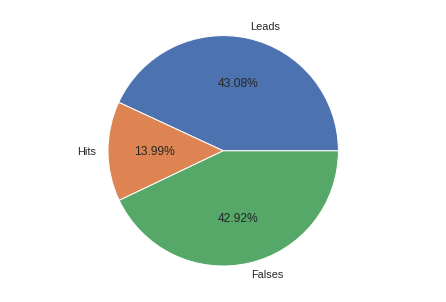

In [280]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
Label = ['Leads', 'Hits', 'Falses']
clients = [len(ratings_with_falses[ratings_with_falses['score']==2]), 
           len(ratings_with_falses[ratings_with_falses['score']==1]),
           len(ratings_with_falses[ratings_with_falses['score']==0])]
ax.pie(clients, labels = Label,autopct='%1.2f%%')
#plt.title(, fontweight="bold")
plt.show()

In [281]:
ratings_with_falses['score'].unique()

array([0, 2, 1])

### Grabamos el nuevo csv

In [282]:
path = '/home/fvadell/ml-tests/labs-ml-group/maestria-2019'

In [283]:
ratings_with_falses.to_csv(path_or_buf=path+'/ratings_with_falses_filtered.csv', index=False)

## Creo un dataset basado principalmente en hits

In [84]:
print(len(user_hit))
user_hit.head(2)

15094054


,portal,date,idaviso,idusuario
0,ZPAR,2018-12-09,f87302f54c651cc0734dbc36143c406a2c0ef79d,11a16489177fbec23b1c879d592e06ba9a003676
1,ZPAR,2018-12-09,9969de0b6d10900a3006f520e8a2071a729392fb,11a16489177fbec23b1c879d592e06ba9a003676


In [85]:
print(len(user_feat))
user_feat.head(2)

275140


,fecha_de_alta,ultima_vez_que_se_logueo,idusuario
0,2012-10-04 00:00:00,2019-01-15 07:53:34,8d94cbff31ee48126e360f852af03edc82b058d6
1,2012-10-05 00:00:00,2019-02-09 09:36:59,b91164f23693bfb480a66405af98e8bc99740d60


In [86]:
print(len(items_feat))
items_feat.head(2)

265713


,fecha_alta,precio,moneda,tipo_de_propiedad,tipo_de_operacion,habitaciones,ambientes,garages,banos,metros_cuadrados,metros_totales,antiguedad,barrio,idaviso
0,2012-10-04 00:00:00,85000.0,USD,Terreno agrícola,Venta,0.0,1.0,0.0,0.0,NaN,NaN,0.0,Campana,8efcfc866ca10c1951d41afb45c902b9c9d0becd
1,2012-10-22 00:00:00,525000.0,USD,Apartamento,Venta,2.0,3.0,0.0,2.0,135.0,135.0,0.0,Recoleta,c0c6523c19f33e27b537944a075ce0f8637bc853


In [87]:
ratings = pd.merge(user_hit, contactos, on = ['idaviso', 'idusuario'], how = 'outer')

In [88]:
print(len(ratings))
ratings.head(2)

15538446


,portal,date,idaviso,idusuario,fecha
0,ZPAR,2018-12-09,f87302f54c651cc0734dbc36143c406a2c0ef79d,11a16489177fbec23b1c879d592e06ba9a003676,NaN
1,ZPAR,2018-12-09,9969de0b6d10900a3006f520e8a2071a729392fb,11a16489177fbec23b1c879d592e06ba9a003676,NaN


### Hits per user

In [89]:
hits_per_user =ratings.groupby(['idusuario'], as_index=False).size().reset_index(name='hits_user')

In [92]:
hits_per_user = hits_per_user.sort_values(by='hits_user', ascending = False).reset_index(drop = True)

In [93]:
hits_per_user.head(3)

,idusuario,hits_user
0,4da278b69dc3e24588cd891154c1b3e01da711a3,6497
1,57f5a89c40ab9b5a4acae03e2c49ca745c5ab314,5497
2,b5af8897d17c41ca7f9f58882c3ccefe32b74dcd,5463


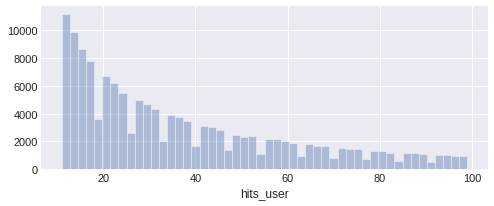

In [94]:
plt.figure(figsize = (8,3))
ax = sns.distplot(hits_per_user[(hits_per_user['hits_user']>10)&(hits_per_user['hits_user']<100)]['hits_user'], kde = False)

In [95]:
hits_per_user = hits_per_user[(hits_per_user['hits_user']>10)&(hits_per_user['hits_user']<100)]

In [96]:
print(len(hits_per_user))
hits_per_user.head(3)

142050


,idusuario,hits_user
42139,cdea45a3b282677ef1907b88f5dea992bc1e7d67,99
42140,dd53a854614e9037c4ea3a5934cb923c6cb860a9,99
42141,791388a6bcb2b7b4175c32e45311b9c254d8dc70,99


Filtramos los que tengan mas de 20 hits y menos de 100

In [97]:
ratings = pd.merge(ratings, hits_per_user, how = 'inner')

In [98]:
len(ratings)

5305954

### Hits per aviso

In [99]:
hits_per_aviso =ratings.groupby(['idaviso'], as_index=False).size().reset_index(name='hits_aviso')

In [100]:
hits_per_aviso = hits_per_aviso.sort_values(by = 'hits_aviso', ascending = False).reset_index(drop = True)

In [101]:
print(len(hits_per_aviso))
hits_per_aviso.head(3)

477698


,idaviso,hits_aviso
0,57d98bb45d992aaa00a2426b1c71ca3b253014f6,2264
1,ad900f00623c0f9fc17f79f3fa5fa2b9b1a35922,2170
2,5ba93bf725a78e530df4b2e1884baf1185d45ba1,1864


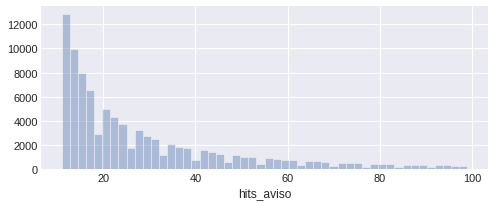

In [102]:
plt.figure(figsize = (8,3))
ax = sns.distplot(hits_per_aviso[(hits_per_aviso['hits_aviso']>10)&(hits_per_aviso['hits_aviso']<100)]['hits_aviso'], kde = False)

In [103]:
hits_per_aviso = hits_per_aviso[(hits_per_aviso['hits_aviso']>10)&(hits_per_aviso['hits_aviso']<100)]

In [104]:
print(len(hits_per_aviso))
hits_per_aviso.head(3)

91350


,idaviso,hits_aviso
8168,453da1f3965a4e76de183fd0725a89f474ee2f41,99
8169,6f6c564519c8e00def0966256b9054620da7b7d8,99
8170,0c7279fbfe86734681d9d0a218b8ee9635038f50,99


In [105]:
ratings = pd.merge(ratings, hits_per_aviso, how = 'inner')

In [106]:
len(ratings)

2677891

### Volvemos a filtrar los usuarios con pocos leads

In [107]:
filtro2 = pd.DataFrame(ratings.idusuario.value_counts())

In [109]:
filtro2 = filtro2.reset_index()
filtro2.columns = ['idusuario', 'hits_user']

In [110]:
filtro2.head()

,idusuario,hits_user
0,7f89ae03b00618a5ca565274280ec37703254573,92
1,cb9d8f386bd2f9bfface132480b29ce788f431c0,89
2,a060d00e1714a34e6ea47d2518d396dbe923bbe2,88
3,bf08e2d46fb20e198d6a6a774c385dfa8b2a528e,87
4,e6ea5610fd69d393d0adcc4af6d81bc6a57a214a,86


In [111]:
filtro2 = filtro2[filtro2['hits_user']>=10]

Vuelvo a filtrar la matriz de ratings usando estos usuarios

In [115]:
ratings = pd.merge(ratings.drop('hits_user', axis = 1), filtro2, how = 'inner', on = 'idusuario')

In [116]:
print(len(ratings))
ratings.head(3)

2424854


,portal,date,idaviso,idusuario,fecha,hits_aviso,hits_user
0,ZPAR,2018-11-27,3f4bac132ecbf60c84e9c6d2131bc0b6fd15a294,11c9f2c26c0f759b8399ed045d579115d73f621b,2018-11-27 12:59:45,35,18
1,ZPAR,2018-12-05,c24a2b4c484f97cf89a003194013d905c0bbb5ef,11c9f2c26c0f759b8399ed045d579115d73f621b,NaN,39,18
2,ZPAR,2018-12-03,7c1e39c3c92338111d97242632defb84b723aee1,11c9f2c26c0f759b8399ed045d579115d73f621b,NaN,83,18


In [146]:
ratings = pd.merge(ratings, items_feat, how = 'inner', on = 'idaviso')

In [147]:
print(len(ratings))
ratings.head(3)

653945


,portal,date,idaviso,idusuario,fecha,hits_aviso,hits_user,fecha_alta,precio,moneda,tipo_de_propiedad,tipo_de_operacion,habitaciones,ambientes,garages,banos,metros_cuadrados,metros_totales,antiguedad,barrio
0,ZPAR,2018-11-17,130643631c74fab1e90fbfcc19c399dc90914d13,cba6c3cfb9aae56e2b792ab30ded4e837b47833c,NaN,22,24,2016-03-03 14:23:48,125000.0,USD,Edificio,Venta,3.0,4.0,1.0,1.0,71.0,101.0,0.0,Tigre
1,ZPAR,2018-11-21,130643631c74fab1e90fbfcc19c399dc90914d13,8d69bb5213f4786f1b34b468d86b171e02be2dcd,NaN,22,30,2016-03-03 14:23:48,125000.0,USD,Edificio,Venta,3.0,4.0,1.0,1.0,71.0,101.0,0.0,Tigre
2,ZPAR,2018-11-07,130643631c74fab1e90fbfcc19c399dc90914d13,cd5d4eb296f8b0004de976020399d399d402e544,NaN,22,28,2016-03-03 14:23:48,125000.0,USD,Edificio,Venta,3.0,4.0,1.0,1.0,71.0,101.0,0.0,Tigre


### Barrio favorito

In [154]:
fav_barrio = ratings.filter(['idusuario', 'barrio']).groupby(['idusuario'], as_index = False).agg(lambda x:x.value_counts().index[0])

In [155]:
fav_barrio.columns = ['idusuario', 'fav_barrio']

In [156]:
fav_barrio.head()

,idusuario,fav_barrio
0,0001c214123cf40b3d061a513ee742f36238f508,Nuñez
1,0003e155940c4c891e70cfeef193a88d322c9105,Villa Crespo
2,0006e9e6890183513d23eab32d601bffbb3e7f86,Neuquén
3,0007ce0bb9227a81e76151f019b3abfa268c735e,Palermo
4,000835d40e865d35a470b2445882f3ac7f81ba82,La Matanza


In [157]:
len(fav_barrio), len(ratings['idusuario'].unique())

(58342, 58342)

Agregamos la información de barrio favorito a la matriz de ratings

In [158]:
ratings = pd.merge(ratings, fav_barrio, on = 'idusuario', how = 'outer')

In [159]:
ratings.head()

,portal,date,idaviso,idusuario,fecha,hits_aviso,hits_user,fecha_alta,precio,moneda,...,tipo_de_operacion,habitaciones,ambientes,garages,banos,metros_cuadrados,metros_totales,antiguedad,barrio,fav_barrio
0,ZPAR,2018-11-17,130643631c74fab1e90fbfcc19c399dc90914d13,cba6c3cfb9aae56e2b792ab30ded4e837b47833c,NaN,22,24,2016-03-03 14:23:48,125000.0,USD,...,Venta,3.0,4.0,1.0,1.0,71.0,101.0,0.0,Tigre,Tigre
1,ZPAR,2018-11-24,9f0082132a0965b3850dc93c58ad29240f317ee2,cba6c3cfb9aae56e2b792ab30ded4e837b47833c,NaN,78,24,2018-10-12 10:33:36,94500.0,USD,...,Venta,0.0,1.0,0.0,1.0,32.0,50.0,0.0,Villa Urquiza,Tigre
2,ZPAR,2018-11-21,130643631c74fab1e90fbfcc19c399dc90914d13,8d69bb5213f4786f1b34b468d86b171e02be2dcd,NaN,22,30,2016-03-03 14:23:48,125000.0,USD,...,Venta,3.0,4.0,1.0,1.0,71.0,101.0,0.0,Tigre,Tigre
3,ZPAR,2018-12-20,fdc9c6f803edf0bca3c862ac6cf7a19c9a117c8f,8d69bb5213f4786f1b34b468d86b171e02be2dcd,NaN,20,30,2018-11-22 08:30:15,135000.0,USD,...,Venta,2.0,NaN,NaN,2.0,74.0,104.0,NaN,Tigre,Tigre
4,ZPAR,2018-12-20,9380bbf8024683d35322edc5ba2d15351898f9bb,8d69bb5213f4786f1b34b468d86b171e02be2dcd,NaN,42,30,2018-10-30 19:50:43,144000.0,USD,...,Venta,2.0,3.0,2.0,1.0,102.0,463.0,0.0,Tigre,Tigre


In [160]:
def get_favorite_barrio(df, idusuario, print_error = False):
    try:
        res = df[df['idusuario']==idusuario].barrio.mode()[0]
    except:
        try:
            res = list(ratings_f[ratings_f['idusuario']==idusuario]['barrio'])[0]
        except:
            if print_error: print('No favorite for user ', idusuario)
            res = None
    return res

In [162]:
list(ratings[ratings['idusuario']=='cba6c3cfb9aae56e2b792ab30ded4e837b47833c']['fav_barrio'])[0]

'Tigre'

### Agrego combinaciones falsas y le asigno score 0

In [163]:
b = ratings.filter(['idaviso', 'barrio']).drop_duplicates('idaviso')

In [164]:
print(len(b))
b.head()

28457


,idaviso,barrio
0,130643631c74fab1e90fbfcc19c399dc90914d13,Tigre
1,9f0082132a0965b3850dc93c58ad29240f317ee2,Villa Urquiza
3,fdc9c6f803edf0bca3c862ac6cf7a19c9a117c8f,Tigre
4,9380bbf8024683d35322edc5ba2d15351898f9bb,Tigre
5,2905cebed6f07fd9c202e28f3f62bf811d1f7d86,San Isidro


In [165]:
hits_per_aviso = pd.merge(hits_per_aviso, b, how = 'inner')

In [166]:
len(ratings['idusuario'].unique())

58342

Con todos los filtros que hubo vamos a actualizar la columna hits_user y hits_aviso

In [199]:
hits_per_user =ratings.groupby(['idusuario'], as_index=False).size().reset_index(name='hits_user')

In [206]:
hits_per_user = hits_per_user[(hits_per_user['hits_user']>= 10)]

In [207]:
ratings = pd.merge(ratings.drop('hits_user', axis = 1), hits_per_user, how = 'inner')

In [209]:
print(len(ratings))
ratings.head()

554675


,portal,date,idaviso,idusuario,fecha,hits_aviso,fecha_alta,precio,moneda,tipo_de_propiedad,...,ambientes,garages,banos,metros_cuadrados,metros_totales,antiguedad,barrio,fav_barrio,score,hits_user
0,ZPAR,2018-11-21,130643631c74fab1e90fbfcc19c399dc90914d13,8d69bb5213f4786f1b34b468d86b171e02be2dcd,NaN,22,2016-03-03 14:23:48,125000.0,USD,Edificio,...,4.0,1.0,1.0,71.0,101.0,0.0,Tigre,Tigre,1,13
1,ZPAR,2018-12-20,fdc9c6f803edf0bca3c862ac6cf7a19c9a117c8f,8d69bb5213f4786f1b34b468d86b171e02be2dcd,NaN,20,2018-11-22 08:30:15,135000.0,USD,Casa,...,NaN,NaN,2.0,74.0,104.0,NaN,Tigre,Tigre,1,13
2,ZPAR,2018-12-20,9380bbf8024683d35322edc5ba2d15351898f9bb,8d69bb5213f4786f1b34b468d86b171e02be2dcd,NaN,42,2018-10-30 19:50:43,144000.0,USD,Casa,...,3.0,2.0,1.0,102.0,463.0,0.0,Tigre,Tigre,1,13
3,ZPAR,2018-11-21,2905cebed6f07fd9c202e28f3f62bf811d1f7d86,8d69bb5213f4786f1b34b468d86b171e02be2dcd,NaN,15,2018-11-21 09:53:56,150000.0,USD,Casa,...,3.0,1.0,2.0,132.0,310.0,NaN,San Isidro,Tigre,1,13
4,ZPAR,2018-12-01,5348d3cc82c5f743938ce0a8b9501eb3cd206201,8d69bb5213f4786f1b34b468d86b171e02be2dcd,NaN,15,2018-08-07 11:40:12,135000.0,USD,Casa,...,3.0,1.0,1.0,72.0,132.0,6.0,Pilar,Tigre,1,13


In [211]:
hits_per_aviso = ratings.groupby(['idaviso'], as_index=False).size().reset_index(name='hits_aviso').sort_values('hits_aviso')

In [212]:
hits_per_aviso = hits_per_aviso[(hits_per_aviso['hits_aviso']>= 10)]

In [213]:
ratings = pd.merge(ratings.drop('hits_aviso', axis = 1), hits_per_aviso, how = 'inner')

In [214]:
len(ratings)

520507

In [222]:
df = pd.DataFrame()
hits_per_user =ratings.groupby(['idusuario'], as_index=False).size().reset_index(name='hits_user')
i = 0
users = ratings['idusuario'].unique()
cant_users = len(users)
for user in users:
    i = i+1
    #cant_leads = len(ratings[(ratings['idusuario']==user)&(ratings_f['score']==2)])
    #cant_leads = ratings[ratings['idusuario']==user].iloc[0,:]['hits_user']
    #print(list(hits_per_user[hits_per_user['idusuario']==user]['hits_user'])[0])
    cant_leads = list(hits_per_user[hits_per_user['idusuario']==user]['hits_user'])[0]
    a = [user for x in range(cant_leads)]
    b = b.sample(frac=1, random_state=seed+i).reset_index(drop=True) #Le aplico un shuffle (el seed va amumentando de a 1 para que no sea el mismo)
    #fav_barrio = get_favorite_barrio(df = ratings_f[ratings_f['score']==2], idusuario = user)
    fav_barrio = list(ratings[ratings['idusuario']==user]['fav_barrio'])[0]
    aux = pd.DataFrame((zip(a, b[b['barrio']!=fav_barrio]['idaviso'])))
    df = pd.concat([df, aux])
    if (i%10 == 0):
        print(i*100/cant_users, end="\r")
print('')
print('Completado!')

99.9789695057833856
Completado!


In [223]:
df.columns = ['idusuario', 'idaviso']

In [224]:
len(df), len(ratings)

(520507, 520507)

In [225]:
false_ratings = pd.merge(df, items_feat, how = 'inner', on='idaviso')

false_ratings.drop_duplicates(['idusuario', 'idaviso'], inplace=True)
print(len(false_ratings))

520507


In [226]:
false_ratings = pd.merge(false_ratings, hits_per_user, on = 'idusuario', how = 'inner')

print(len(false_ratings))
false_ratings.head()

520507


,idusuario,idaviso,fecha_alta,precio,moneda,tipo_de_propiedad,tipo_de_operacion,habitaciones,ambientes,garages,banos,metros_cuadrados,metros_totales,antiguedad,barrio,hits_user
0,8d69bb5213f4786f1b34b468d86b171e02be2dcd,b424ad9161febe7e12d3b39bffab2588b84fbfc4,2018-02-17 02:09:55,84000.0,USD,Apartamento,Venta,2.0,3.0,NaN,1.0,44.0,44.0,28.0,Boedo,12
1,8d69bb5213f4786f1b34b468d86b171e02be2dcd,5ad6f80558f9d71bcade071fff5f568803bf68d3,2018-08-31 15:49:21,79000.0,USD,Apartamento,Venta,1.0,2.0,1.0,1.0,72.0,72.0,12.0,Estados Unidos,12
2,8d69bb5213f4786f1b34b468d86b171e02be2dcd,014a76ebc2f04a266ee13f2cd7a84cc1731a76c7,2018-08-16 15:30:19,55000.0,USD,Apartamento,Venta,1.0,1.0,0.0,1.0,24.0,24.0,50.0,Flores,12
3,8d69bb5213f4786f1b34b468d86b171e02be2dcd,86d25de757ed7f4a805c76924dc73067a3f8e343,2018-10-18 12:19:53,135000.0,USD,Apartamento,Venta,1.0,2.0,0.0,1.0,30.0,0.0,40.0,San Isidro,12
4,8d69bb5213f4786f1b34b468d86b171e02be2dcd,edbcac73472f3a85a4691ab285afe66b13404ad0,2018-05-14 13:54:41,205000.0,USD,Apartamento,Venta,3.0,4.0,0.0,2.0,76.0,88.0,0.0,Caballito,12


In [229]:
false_ratings = pd.merge(false_ratings, hits_per_aviso.drop(['hits_aviso'], axis = 1), on = 'idaviso', how = 'inner')

print(len(false_ratings))
false_ratings.head()

417536


,idusuario,idaviso,fecha_alta,precio,moneda,tipo_de_propiedad,tipo_de_operacion,habitaciones,ambientes,garages,banos,metros_cuadrados,metros_totales,antiguedad,barrio,hits_user
0,8d69bb5213f4786f1b34b468d86b171e02be2dcd,b424ad9161febe7e12d3b39bffab2588b84fbfc4,2018-02-17 02:09:55,84000.0,USD,Apartamento,Venta,2.0,3.0,NaN,1.0,44.0,44.0,28.0,Boedo,12
1,b1611b9cba448637d3c29b7d7d90c1f2a8d20157,b424ad9161febe7e12d3b39bffab2588b84fbfc4,2018-02-17 02:09:55,84000.0,USD,Apartamento,Venta,2.0,3.0,NaN,1.0,44.0,44.0,28.0,Boedo,50
2,203d558f889674fe24c6f1a77cb1c15b7013ecdf,b424ad9161febe7e12d3b39bffab2588b84fbfc4,2018-02-17 02:09:55,84000.0,USD,Apartamento,Venta,2.0,3.0,NaN,1.0,44.0,44.0,28.0,Boedo,39
3,7b44226d9660ffbcf6fc10914b4c3a18f4cf0b93,b424ad9161febe7e12d3b39bffab2588b84fbfc4,2018-02-17 02:09:55,84000.0,USD,Apartamento,Venta,2.0,3.0,NaN,1.0,44.0,44.0,28.0,Boedo,75
4,21d2089ad1f6b0d8e28100d02b21313e20d48d69,b424ad9161febe7e12d3b39bffab2588b84fbfc4,2018-02-17 02:09:55,84000.0,USD,Apartamento,Venta,2.0,3.0,NaN,1.0,44.0,44.0,28.0,Boedo,18


In [230]:
ratings['score'] = 1

Agrego las columnas que faltan para que sea igual a ratings y le pongo el score en 0


In [231]:
for i in ratings.columns:
    if not(i in list(false_ratings.columns)):
        false_ratings[i] = np.nan
false_ratings['score'] = 0

Tienen las mismas columnas

In [232]:
assert(set(false_ratings.columns) == set(ratings.columns))

Y ordenamos las columnas igual

In [233]:
false_ratings = false_ratings.filter(list(ratings.columns))

ratings_with_falses = pd.concat([ratings, false_ratings])

In [234]:
len(ratings), len(ratings_with_falses)

(520507, 938043)

In [235]:
ratings_with_falses = ratings_with_falses.sort_values(['idaviso', 'idusuario', 'score'], ascending=[True, True, False])

In [236]:
ratings_with_falses = ratings_with_falses.drop_duplicates(subset=['idaviso', 'idusuario'])

QUé pasa acá!?!?!

In [237]:
#ratings_with_falses.reset_index(drop=True, inplace=True)

In [238]:
len(ratings), len(ratings_with_falses)

(520507, 846631)

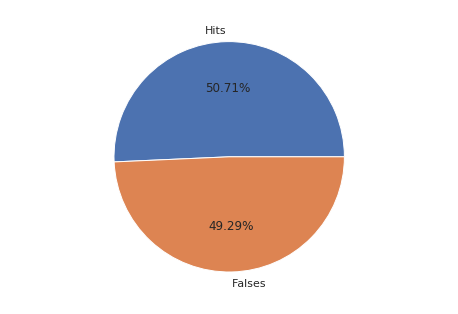

In [239]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
Label = ['Hits', 'Falses']
clients = [len(ratings_with_falses[ratings_with_falses['score']==1]),
           len(ratings_with_falses[ratings_with_falses['score']==0])]
ax.pie(clients, labels = Label,autopct='%1.2f%%')
#plt.title(, fontweight="bold")
plt.show()

#### Cantidad total de relaciones

In [248]:
len(ratings_with_falses)

846631

#### Cantidad de usuarios

In [245]:
len(ratings_with_falses['idusuario'].unique())

23775

#### Cantidad de avisos

In [246]:
len(ratings_with_falses['idaviso'].unique())

22913

#### Cantidad de barrios

In [247]:
len(ratings_with_falses['barrio'].unique())

206

### Grabamos el nuevo csv

In [241]:
path = '/home/fvadell/ml-tests/labs-ml-group/maestria-2019'

In [242]:
ratings_with_falses.to_csv(path_or_buf=path+'/hits_with_falses_filtered.csv', index=False)